<a href="https://colab.research.google.com/github/phutares/ClusterAndAnalysisCustomer/blob/main/63606031_Phutares_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastai

warnings.filterwarnings("ignore")

NameError: ignored

**Import Mall Customer Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customer_Cleaned.csv') # ใช้ dataset ที่ถูก clean แล้ว

In [ ]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Bins
0,1,M,19,15,39,น้อย
1,2,M,21,15,81,น้อย
2,3,F,20,16,6,น้อย
3,4,F,23,16,77,น้อย
4,5,F,31,17,40,น้อย


In [ ]:
df['Bins'].unique()

array(['น้อย', 'ปานกลาง', 'มาก'], dtype=object)

**More Clean data**

In [ ]:
df.replace({'Gender': 'F'}, 0,inplace=True)
df.replace({'Gender': 'M'}, 1,inplace=True)

In [ ]:
df.replace({'Bins': {'น้อย': 0, 'ปานกลาง': 1, 'มาก': 2}},inplace=True)

In [ ]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Bins
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,56,79,1
196,197,0,45,56,28,1
197,198,1,32,56,74,1
198,199,1,32,56,18,1


In [ ]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Bins
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,56,79,1
196,197,0,45,56,28,1
197,198,1,32,56,74,1
198,199,1,32,56,18,1


ดูการการะจายข้อมูลของทั้ง 3 Column

In [ ]:
# df.drop(columns=['CustomerID','Gender','Bins'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

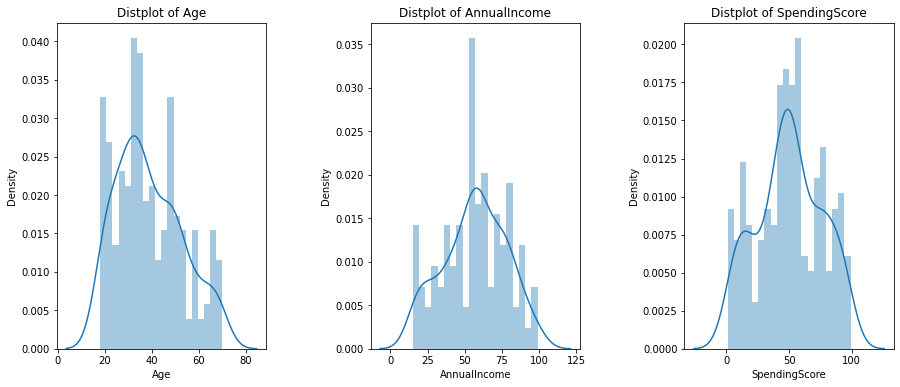

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show();

Plot รายได้ต่อปี กับ คะแนนการใช้จ่าย เมื่อดู Gender

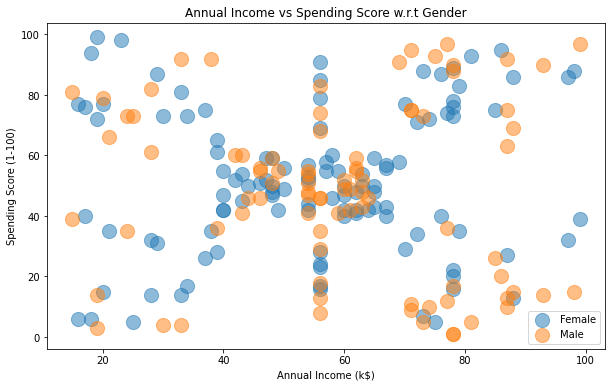

In [ ]:
plt.figure(1 , figsize = (10 , 6))
for gender in range(2):
    plt.scatter(x = 'AnnualIncome',y = 'SpendingScore' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend(['Female', 'Male'])
plt.show()

**Model and Find Number of Cluster**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans()
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

**take values and then use it to tranform data is same as use all df in to fit_tranform data by StandardScaler**

- dataset_array = df.values
- dataset_array.dtype
- dataset_array

#**Age และ Spending Score**

In [ ]:
X1 = df[['Age' , 'SpendingScore']].iloc[: , :].values # เลือกข้อมูลเฉพาะ Age กับ SpendingScore
K1 = range(1 , 10)
inertia = []
for n in K1:
    twoDModel = KMeans(n_clusters = n ,init='k-means++') 
    twoDModel.fit(X1)
    inertia.append(twoDModel.inertia_)

Text(0.5, 1.0, 'elbow method for optimal k')

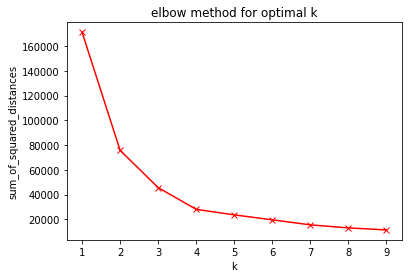

In [ ]:
plt.plot(K1,inertia,'rx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')

**ได้ k = 4 ด้วย Square Error**

In [ ]:
sc = []
K = range(2,15)
kmeans_kwargs = {
    "init": "k-means++", # เริ่ม assign ข้อมูลเข้าไปในแต่ละกลุ่ม
    "n_init": 10,
    "max_iter": 100, # วนรูปในการแบ่งกลุ่มไว้ 100 ครั้ง
}
for k in K:
  twoDModel = KMeans(n_clusters=k, **kmeans_kwargs)
  twoDModel.fit(X1)
  score = silhouette_score(X1, twoDModel.labels_)
  sc.append(score)

sc

[0.4690014670074595,
 0.4535295534555439,
 0.49876241535456295,
 0.4470682064917659,
 0.44115336587920045,
 0.42323206167471084,
 0.4262834253469325,
 0.4180114405431166,
 0.3962911301400382,
 0.3893468209636548,
 0.4060957059922541,
 0.4096789905479304,
 0.40703620278579367]

Text(0.5, 0, 'K')

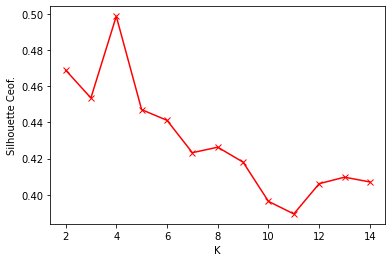

In [ ]:
plt.plot(K,sc,'rx-')
plt.ylabel('Silhouette Ceof.')
plt.xlabel('K') 

**ได้ k = 4 ด้วย Silhouette**

**ตัดสินใจปั้น model ด้วย k = 4**

In [ ]:
model = KMeans(n_clusters = 4 ,init='k-means++')
model.fit(X1)
labels1 = model.labels_
centroids1 = model.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

**Explore กลุ่มของข้อมูล**

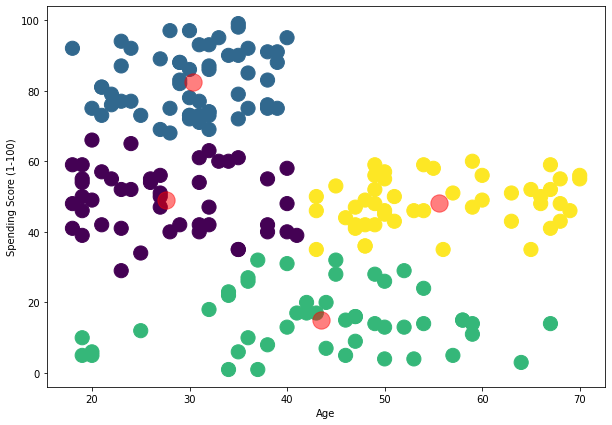

In [ ]:
plt.figure(1 , figsize = (10 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.scatter( x = 'Age' ,y = 'SpendingScore' , data = df , c = labels1 , 
            s = 200 , cmap = 'viridis')
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [ ]:
# ดูภาพในรูปแบบ DataFrame
Cluster_data = pd.DataFrame({
    'Age': X1[:,0],
    'SpendingScore': X1[:,1],
    'kmeans_id': model.labels_
})

In [ ]:
Cluster_data

,Age,SpendingScore,kmeans_id
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


In [ ]:
# ทดลองทำนาย
model.predict(X1) 

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

#**Age และ AnnualIncome และ Spending Score**

In [ ]:
# X = StandardScaler().fit_transform(df)
X = df[['Age', 'AnnualIncome','SpendingScore']].iloc[: , :].values
X

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40],
       [22, 17, 76],
       [35, 18,  6],
       [23, 18, 94],
       [64, 19,  3],
       [30, 19, 72],
       [67, 19, 14],
       [35, 19, 99],
       [58, 20, 15],
       [24, 20, 77],
       [50, 56, 13],
       [22, 20, 79],
       [35, 21, 35],
       [20, 21, 66],
       [52, 56, 29],
       [35, 23, 98],
       [35, 24, 35],
       [25, 24, 73],
       [46, 25,  5],
       [31, 25, 73],
       [54, 28, 14],
       [29, 28, 82],
       [45, 28, 32],
       [35, 28, 61],
       [40, 29, 31],
       [23, 29, 87],
       [50, 30,  4],
       [21, 30, 73],
       [53, 33,  4],
       [18, 33, 92],
       [49, 33, 14],
       [21, 33, 81],
       [42, 34, 17],
       [30, 34, 73],
       [36, 37, 26],
       [20, 37, 75],
       [65, 38, 35],
       [24, 38, 92],
       [48, 39, 36],
       [31, 39, 61],
       [49, 39, 28],
       [24, 39, 65],
       [50, 40, 55],
       [27, 4

In [ ]:
K = range(1,15) # หากลุ่มให้กับข้อมูลกลุ่มนี้ ว่าตัวไหนเหมาะสมที่สุด
E2 = []
for k in K:
  threeDmodel = KMeans(n_clusters=k)
  threeDmodel.fit(X)
  E2.append(threeDmodel.inertia_)

E2

[259333.59000000003,
 163799.75754475704,
 126868.78035714287,
 92807.88585053978,
 66827.97364854629,
 49886.5791971336,
 45418.87343318042,
 41542.5061275326,
 38476.82896721655,
 35066.686270703925,
 32134.35480668757,
 30185.38744472114,
 27469.16991371202,
 25872.05119874106]

Text(0.5, 1.0, 'elbow method for optimal k')

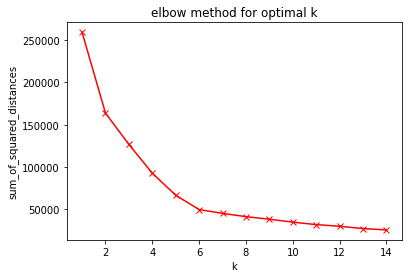

In [ ]:
plt.plot(K,E2,'rx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')

**จะได้ k = 6 ด้วย Square Error**

In [ ]:
sc = []
K = range(2,15)
kmeans_kwargs = {
    "init": "k-means++", # เริ่ม assign ข้อมูลเข้าไปในแต่ละกลุ่ม
    "n_init": 10,
    "max_iter": 100, # วนรูปในการแบ่งกลุ่มไว้ 100 ครั้ง
}
for k in K:
  threeDmodel = KMeans(n_clusters=k, **kmeans_kwargs)
  threeDmodel.fit(X)
  score = silhouette_score(X, threeDmodel.labels_)
  sc.append(score)

sc

[0.325548803587824,
 0.3167590558979536,
 0.36785920336287264,
 0.41630396320839425,
 0.433486284655907,
 0.4055258103212276,
 0.40303134683247693,
 0.4018015613526429,
 0.36050834157527584,
 0.3263664419530927,
 0.33781664291331276,
 0.34926285697296905,
 0.34917822970026263]

Text(0.5, 0, 'K')

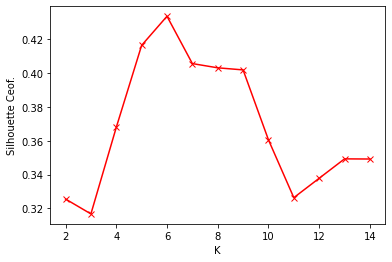

In [ ]:
plt.plot(K,sc,'rx-')
plt.ylabel('Silhouette Ceof.')
plt.xlabel('K') 

**จะได้ k = 6 ด้วย Silhouette**

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X);
kmeans.predict(X)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 1, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 1, 5,
       4, 2, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 5, 0, 3, 0, 5, 0, 3, 0, 3, 1, 3,
       0, 3], dtype=int32)

In [ ]:
label = threeDmodel.labels_

In [ ]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)


In [ ]:
df['labels'] =  label
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['SpendingScore'],
    z= df['AnnualIncome'],
    mode='markers', 
     marker=dict(
        color = df['labels'], 
        size= 20,
        line=dict(
            color= df['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    width=640,
    height=640,
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
  '''))

In [ ]:
configure_plotly_browser_state()
py.offline.iplot(fig)